<a href="https://colab.research.google.com/github/loroldoesmath/intro-to-ML/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

Linear Regression is a supervised learning technique in which a "best-fit" line is generated based on existing data and then used to make predictions about additional data.

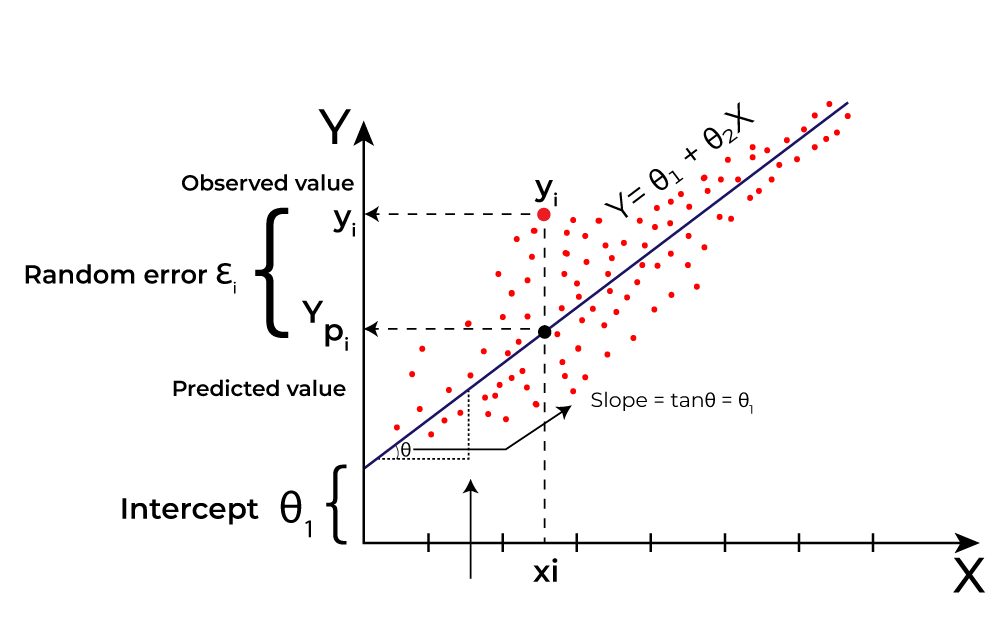

## Set Up
Let's start by importing the necessary libraries along with our dataset.

💾 For this simple linear regression problem, we're going to use the [Salary vs Experience](https://www.kaggle.com/datasets/harsh45/random-salary-data-of-employes-age-wise) dataset.

In [ ]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Select a locally downloaded file - Salary_Data.csv
from google.colab import files
uploaded = files.upload()

# Upload dataset
df = pd.read_csv('Salary_Data.csv')

# See first five rows + meta data
display(df.head())
df.info()

Saving brain_stroke.csv to brain_stroke.csv


FileNotFoundError: [Errno 2] No such file or directory: 'Salary_Data.csv'

## Visualizing the Data

A dataset suitable for linear regression should have the following qualities:

1. It should have a somewhat linear relationship between the dependent variable (response) should have a linear relationship with the independent variable(s) (predictors).

2. The data should have no missing values and minimal outliers, as outliers can disproportionately affect linear regression models.

3. The data should have sufficient data points. A rule of thumb is at least 10-15 observations per predictor variable.

Now, let's create a scatter plot of our data.

❓ Is this dataset a good candidate for linear regression?

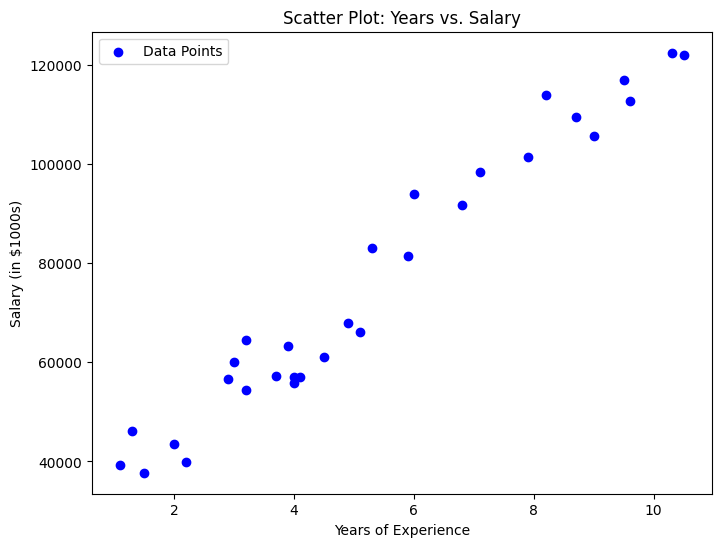

In [ ]:
def plot_data():
    plt.figure(figsize=(8, 6))
    plt.scatter(df['YearsExperience'], df['Salary'], color='blue', label='Data Points')
    plt.title('Scatter Plot: Years vs. Salary')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary (in $1000s)')
    plt.legend()
    plt.show()

plot_data()

## Preprocessing

Generally speaking, our preprocessing steps are as follows:

1. Check for Missing Data: Ensure there are no null or missing values in the dataset.
2. Remove or Treat Outliers: Use statistical methods like Z-scores or IQR to identify and address outliers.
3. Normalize or Standardize Data: If features have vastly different scales, consider normalizing or standardizing.
4. Encode Categorical Variables: Convert categorical variables into numerical format (e.g., one-hot encoding).
5. Split the Data: Divide the data into training and testing sets for evaluation.

In this dataset, there doesn't seem to be any missing data, outliers, or categorical variables. Because the features don't have vastly different scales that impact linearity, we don't need to normalize or standardize. So, our only preprocessing step is splitting the data.

✅ Try it yourself: Identify the independent and dependent variables and assign them to variables X and y, respectively. Then split the data into 80% for training and 20% for testing.

In [ ]:
X = df[['YearsExperience']].values # Indep. variable
y = df['Salary'].values # Dep. variable

# Split the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Training

In this example, we use the `LinearRegression()` class from Scikit-learn, which is a powerful yet easy-to-use tool for implementing linear regression. The `fit()` method trains the model by finding the line that minimizes the sum of squared residuals—the differences between actual and predicted values in the training dataset. The result of this training process is a linear model defined by its intercept and slope (or coefficients), which represent the optimal parameters for predicting the dependent variable based on the independent variable(s).

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Making Predictions

Once the linear regression model is trained, we can use it to make predictions on new or unseen data. In this case, the `predict()` method of the LinearRegression class is used. This method takes an array of independent variable values (e.g., years of experience) as input and returns the corresponding predicted values of the dependent variable (e.g., salary). Predictions allow us to estimate outcomes for test data or future scenarios based on the relationships learned during training. The predictions can also be visualized by overlaying them on the actual data to assess how well the model captures the underlying trend.

In [ ]:
y_pred = model.predict(X_test)

## Visualizing the Regression Line and Interpret the Coefficients

Now, let's visualize the regression line.

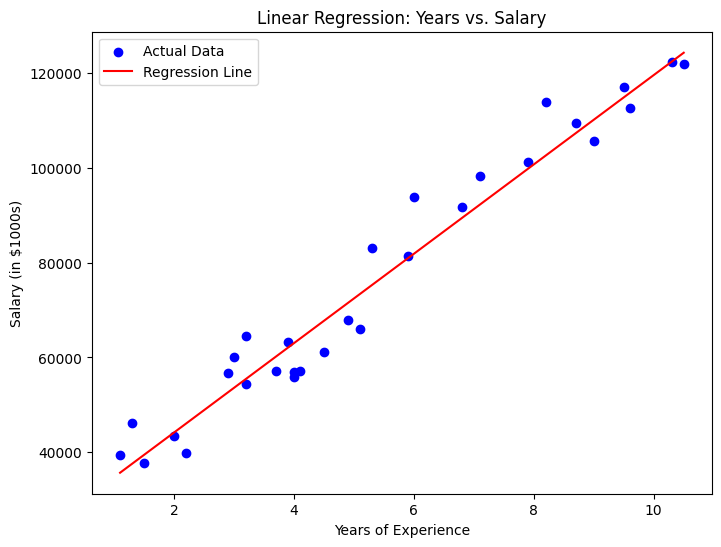

In [ ]:
def plot_regression():
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.plot(X, model.predict(X), color='red', label='Regression Line')
    plt.title('Linear Regression: Years vs. Salary')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary (in $1000s)')
    plt.legend()
    plt.show()

plot_regression()

In [ ]:
# Interpreting the Coefficients
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.2f}")


Model Coefficients:
Intercept: 25321.58
Slope: 9423.82


❓ For every additional year of experience, how much does the salary increase by?

In [ ]:
print(f"For every additional year of experience, the salary increases by {model.coef_[0]:.2f} (in $1000s).")

For every additional year of experience, the salary increases by 9423.82 (in $1000s).


## Model Evaluation

Evaluating a model is an essential step to determine how well it captures the relationship between variables and predicts new data. For linear regression, a commonly used metric is the R-squared (R²) value, which shows the proportion of variance in the dependent variable explained by the independent variable(s). An R² value close to 1 suggests a strong fit, while a value near 0 implies a weak relationship. Another important aspect of evaluation involves analyzing residuals (the differences between actual and predicted values) to ensure they are randomly distributed, which indicates that the model is capturing the trend effectively without bias. These methods help us understand the accuracy and reliability of the model in making predictions.

The Mean Squared Error (MSE) is a metric used to evaluate the accuracy of a regression model by measuring the average squared difference between actual and predicted values. It provides an indication of how far the model's predictions are from the true data points. A smaller MSE value means that the predictions are closer to the actual values, indicating a better fit of the model. Squaring the errors ensures that larger discrepancies have a more significant impact on the metric, which can highlight areas where the model may not be performing well.

❓ What does our MSE and R2 value say about our model?

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Model Evaluation:
Mean Squared Error (MSE): 49830096.86
R-squared (R2): 0.90


## Simple Linear Regression vs. Multiple Linear Regression

The example we just worked through is an example of *simple linear regression*--regression in which we analyze the relationship between one independent variable (one feature) and one dependent variable (our target). In *multiple regression*, however, we examine the relationship between two or more independent variables (targets) and our dependent variable (target).

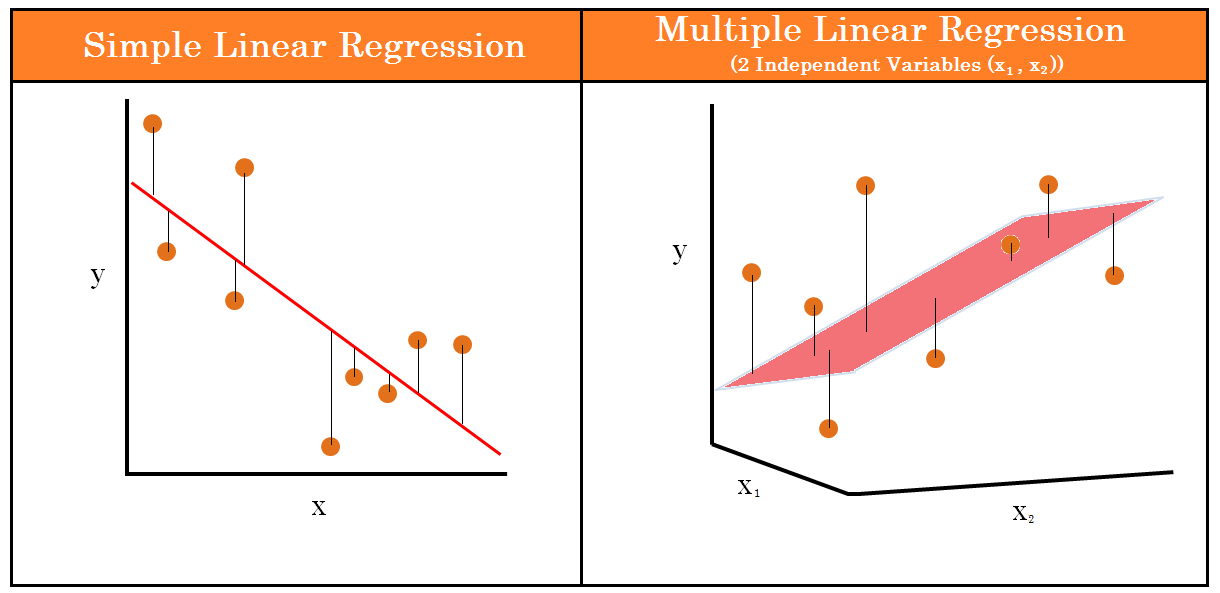

🤺 Challenge: Using this dataset [this dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance), can you create a linear regression model to predict

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
# Upload dataset


# See first five rows + meta data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB



Multiple Linear Regression Analysis:
Model Coefficients:
age: 256.98
bmi: 337.09
children: 425.28
sex_male: -18.59
smoker_yes: 23651.13
region_northwest: -370.68
region_southeast: -657.86
region_southwest: -809.80
Intercept: -11931.22
Mean Squared Error (MSE): 33596915.85
R-squared (R2): 0.78


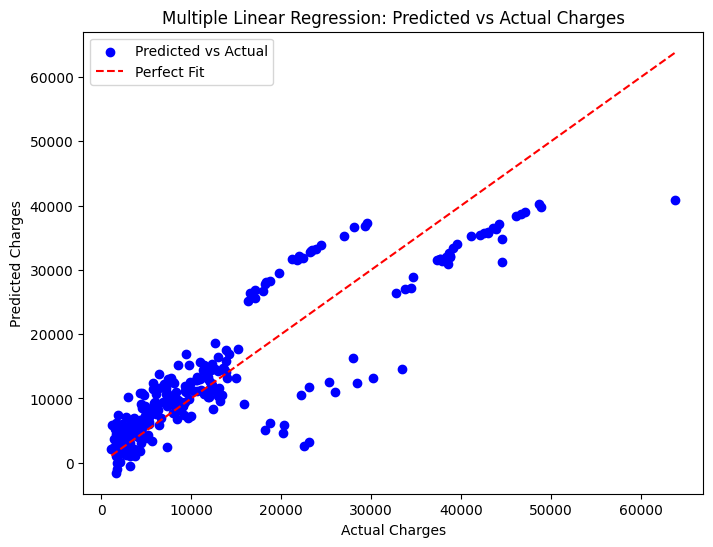

In [ ]:
# Multiple Linear Regression


# Define Features and Target

# Split into Training and Testing Sets

# Create and Train Model

# Make Predictions

# Evaluate Model

# Visualization of Predicted vs Actual


👉 Talk about your results: What types of values does your regression line work best for? Can you think of a change to the model that would result in a higher accuracy rate?